In [5]:
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth',None)   #this displays the dataframe in full width
import collections
from collections import Counter

In [6]:
!pip install indic_nlp_library

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from indicnlp.tokenize import indic_tokenize

In [9]:
df1 = pd.read_csv('/content/NDTV_MoneyLaundering.csv')
df2 = pd.read_csv('/content/zeenews_Money_Laundering - zeenews_Money_Laundering.csv')

In [10]:
print('DF 1: ', df1.shape)
print('DF 2:', df2.shape)

DF 1:  (259, 5)
DF 2: (49, 5)


In [11]:
df = pd.concat([df1, df2], ignore_index=True)

In [12]:
df.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [13]:
df.tail()

,news_title,news_details,news_date,source_name
303,"14 दिन की न्यायिक हिरासत में सत्येंद्र जैन, याचिका पर आज होगी सुनवाई",आम आदमी पार्टी के वरिष्ठ नेता और मंत्री सत्येंद्र जैन को राहत नहीं मिली है. मनी लॉन्ड्रिंग मामले में इन दिनों जेल की हवा खा रहे हैं. हाल ही में खबर आई हैं. राउज एवेन्यू कोर्ट ने कथित धनशोधन मामले में आप नेता और दिल्ली के मंत्री सत्येंद्र जैन को 14 दिन की न्यायिक हिरासत में भेज दिया गया है. आपको बता दें कि सत्येंद्र जैन को ED ने मनी लॉन्ड्रिंग के केस में 30 मई को गिरफ्तार किया था. आपको बता दें कि सत्येंद्र जैन की याचिका पर आज फिर सुनवाई होनी है.,"Jun 14,2022, 11:45 AM IST",ZEE News
304,नेशनल हेराल्ड केस : 10 घंटे की पूछताछ के बाद ईडी दफ्तर से आवास पहुंचे राहुल गांधी,"इससे पहले दिल्ली पुलिस ने दोपहर को प्रदर्शन के लिए जुट रहे 459 कार्यकर्ताओं और वरिष्ठ नेताओं को हिरासत में ले लिया और उन्हें मंदिर मार्ग, तुगलक रोड और फतेहपुर बेरी पुलिस थाने ले गई. देर रात उन्हें रिहा किया गया. ईडी ने मंगलवार को भी राहुल गांधी को पूछताछ के लिए बुलाया है.","Jun 14,2022, 1:34 AM IST",ZEE News
305,"राहुल गांधी से ED ने तीन घंटे तक की पूछताछ, नरोत्तम मिश्रा बोले-पूरी दाल काली है","राहुल गांधी से ईडी ने तीन घंटे तक पूछताछ की इस दौरान कांग्रेस नेताओं ने ईडी ऑफिस के सामने प्रदर्शन किया, जिस पर नरोत्तम मिश्रा निशाना साधा. उन्होंने कहा कि राहुल गांधी को आखिर किस बात का डर लग रहा है.","Jun 13,2022, 15:44 PM IST",ZEE News
306,National Herald Case: Priyanka Gandhi कार्यकर्ताओं से मिलने थाने पहुंची,कांग्रेस महासचिव प्रियंका गांधी तुगलक रोड स्टेशन पहुंचीं हैं. वह हिरासत में लिए गए कांग्रेस के कार्यकर्ताओं से मुलाकात कर रही हैं.,"Jun 13,2022, 15:12 PM IST",ZEE News
307,"क्या है नेशनल हेराल्ड केस, सोनिया और राहुल से क्या है इसका कनेक्शन",नेशनल हेराल्ड केस (National Herald Case) में राहुल गांधी सोमवार यानी की आज सुबह ED मुख्यालय में पेश हुए हैं. ED ने राहुल गांधी से पूछताछ के लिए सवालों की लंबी लिस्ट तैयार की है. राहुल गांधी के साथ प्रियंका गांधी वाड्रा भी मौजूद है. वहीं इस मामले में ED ने सोनिया गांधी को 23 जून को पेश होने के लिए कहा है. तो चलिए जानते हैं किया नेशनल हेराल्ड केस और क्यों चर्चा में आया.,"Jun 13,2022, 14:32 PM IST",ZEE News


In [14]:
def count_length():
    df['word_count'] = df['news_title'].apply(lambda x: len(str(x).split(" ")))

In [15]:
count_length()

In [16]:
df.head()

,news_title,news_details,news_date,source_name,word_count
0,मनी लॉन्डरिंग केस : बॉलीवुड अभिनेत्री जैकलीन फर्नांडिस को मिली अंतरिम ज़मानत,बता दें कि सुकेश चंद्रशेखर (Sukesh Chandrasekhar) मनी लॉन्ड्रिंग मामले में प्रवर्तन निदेशालय (ED) ने Jacqueline Fernandez के खिलाफ चार्जशीट पेश की थी. ईडी ने अपनी चार्जशीट में उन्हें आरोपी बताया है. कोर्ट ने चार्जशीट पर संज्ञान लेकर जैकलीन को 26 सितंबर को पेश होने के लिए कहा था.,"सोमवार सितम्बर 26, 2022 11:37 AM IST",NDTV News,12
1,अभिनेत्री जैकलीन फर्नांडीज की आज दिल्ली के पटियाला हाउस कोर्ट में बतौर आरोपी पेशी,फिल्म अभिनेत्री जैकलीन फर्नांडीज (Jacqueline Fernandez ) की आज पटियाला हाउस कोर्ट (Patiala House Court) में पेशी होगी. यह उनकी बतौर आरोपी पेशी है. सुकेश चंद्रशेखर (Sukesh Chandrasekhar) मनी लॉन्ड्रिंग मामले में प्रवर्तन निदेशालय (ED) ने उनके खिलाफ चार्जशीट पेश की थी. ईडी ने अपनी चार्जशीट में उन्हें आरोपी बताया है. कोर्ट ने चार्जशीट पर संज्ञान लेकर जैकलीन को 26 सितंबर को पेश होने के लिए कहा था.,"सोमवार सितम्बर 26, 2022 09:02 AM IST",NDTV News,14
2,मनी लॉन्डरिंग केस : कोर्ट ने सत्येंद्र जैन की ज़मानत याचिका स्थानांतरित करने की ED की याचिका को मंज़ूरी दी,अदालत ने मामला अन्य न्यायाधीश को स्थानांतरित करने संबंधी ईडी की याचिका पर जैन एवं सह-आरोपी को नोटिस जारी किया.,"शुक्रवार सितम्बर 23, 2022 03:48 PM IST",NDTV News,20
3,मनी लांड्रिंग मामले में टॉप्स ग्रुप के प्रमोटर और पूर्व एमडी को राहत देने से कोर्ट का इनकार,चंडोले और शशिधरन सुप्रीम कोर्ट के हाल के इस आदेश के आलोक में जेल से रिहा करने की मांग की कि यदि पहले से किसी अन्य एजेंसी द्वारा दर्ज प्रथम सूचना रिपोर्ट नहीं है तो धनशोधन रोकथाम अधिनियम (पीएमएलए) के तहत मामला जारी नहीं रह सकता है. PMLA के प्रावधानों के तहत किसी व्यक्ति के विरुद्ध ईडी की कार्रवाई शुरू करने के लिए ‘अनुसूचित अपराध’ का होना जरूरी है.,"बुधवार सितम्बर 21, 2022 09:18 PM IST",NDTV News,18
4,"मनी लॉन्ड्रिंग मामला: दिल्ली सरकार के मंत्री सत्येंद्र जैन को सुप्रीम कोर्ट से थोड़ी राहत, पढ़ें पूरी खबर",दिल्ली के मंत्री सत्येंद्र जैन को सुप्रीम कोर्ट से राहत मिली है. सुप्रीम कोर्ट ने निचली अदालत से केस को गुरुवार को ही सुनने व फैसला करने के निर्देश दिए है.,"बुधवार सितम्बर 21, 2022 02:48 PM IST",NDTV News,18


In [17]:
def tokenization(indic_string):
    tokens = []
    for t in indic_tokenize.trivial_tokenize(indic_string):
        tokens.append(t)
    return tokens
df['news_title'] = df['news_title'].apply(lambda x: tokenization(x))

In [18]:
df.tail()

,news_title,news_details,news_date,source_name,word_count
303,"[14, दिन, की, न्यायिक, हिरासत, में, सत्येंद्र, जैन, ,, याचिका, पर, आज, होगी, सुनवाई]",आम आदमी पार्टी के वरिष्ठ नेता और मंत्री सत्येंद्र जैन को राहत नहीं मिली है. मनी लॉन्ड्रिंग मामले में इन दिनों जेल की हवा खा रहे हैं. हाल ही में खबर आई हैं. राउज एवेन्यू कोर्ट ने कथित धनशोधन मामले में आप नेता और दिल्ली के मंत्री सत्येंद्र जैन को 14 दिन की न्यायिक हिरासत में भेज दिया गया है. आपको बता दें कि सत्येंद्र जैन को ED ने मनी लॉन्ड्रिंग के केस में 30 मई को गिरफ्तार किया था. आपको बता दें कि सत्येंद्र जैन की याचिका पर आज फिर सुनवाई होनी है.,"Jun 14,2022, 11:45 AM IST",ZEE News,13
304,"[नेशनल, हेराल्ड, केस, :, 10, घंटे, की, पूछताछ, के, बाद, ईडी, दफ्तर, से, आवास, पहुंचे, राहुल, गांधी]","इससे पहले दिल्ली पुलिस ने दोपहर को प्रदर्शन के लिए जुट रहे 459 कार्यकर्ताओं और वरिष्ठ नेताओं को हिरासत में ले लिया और उन्हें मंदिर मार्ग, तुगलक रोड और फतेहपुर बेरी पुलिस थाने ले गई. देर रात उन्हें रिहा किया गया. ईडी ने मंगलवार को भी राहुल गांधी को पूछताछ के लिए बुलाया है.","Jun 14,2022, 1:34 AM IST",ZEE News,17
305,"[राहुल, गांधी, से, ED, ने, तीन, घंटे, तक, की, पूछताछ, ,, नरोत्तम, मिश्रा, बोले, -, पूरी, दाल, काली, है]","राहुल गांधी से ईडी ने तीन घंटे तक पूछताछ की इस दौरान कांग्रेस नेताओं ने ईडी ऑफिस के सामने प्रदर्शन किया, जिस पर नरोत्तम मिश्रा निशाना साधा. उन्होंने कहा कि राहुल गांधी को आखिर किस बात का डर लग रहा है.","Jun 13,2022, 15:44 PM IST",ZEE News,16
306,"[National, Herald, Case, :, Priyanka, Gandhi, कार्यकर्ताओं, से, मिलने, थाने, पहुंची]",कांग्रेस महासचिव प्रियंका गांधी तुगलक रोड स्टेशन पहुंचीं हैं. वह हिरासत में लिए गए कांग्रेस के कार्यकर्ताओं से मुलाकात कर रही हैं.,"Jun 13,2022, 15:12 PM IST",ZEE News,10
307,"[क्या, है, नेशनल, हेराल्ड, केस, ,, सोनिया, और, राहुल, से, क्या, है, इसका, कनेक्शन]",नेशनल हेराल्ड केस (National Herald Case) में राहुल गांधी सोमवार यानी की आज सुबह ED मुख्यालय में पेश हुए हैं. ED ने राहुल गांधी से पूछताछ के लिए सवालों की लंबी लिस्ट तैयार की है. राहुल गांधी के साथ प्रियंका गांधी वाड्रा भी मौजूद है. वहीं इस मामले में ED ने सोनिया गांधी को 23 जून को पेश होने के लिए कहा है. तो चलिए जानते हैं किया नेशनल हेराल्ड केस और क्यों चर्चा में आया.,"Jun 13,2022, 14:32 PM IST",ZEE News,13


In [19]:
stopwords_hi = ['तुम','मेरी','मुझे','क्योंकि','हम','प्रति','अबकी','आगे','माननीय','शहर','बताएं','कौनसी','क्लिक','किसकी','बड़े','मैं','and','रही','आज','लें','आपके','मिलकर','सब','मेरे','जी','श्री','वैसा','आपका','अंदर', 'अत', 'अपना', 'अपनी', 'अपने', 'अभी', 'आदि', 'आप', 'इत्यादि', 'इन', 'इनका', 'इन्हीं', 'इन्हें', 'इन्हों', 'इस', 'इसका', 'इसकी', 'इसके', 'इसमें', 'इसी', 'इसे', 'उन', 'उनका', 'उनकी', 'उनके', 'उनको', 'उन्हीं', 'उन्हें', 'उन्हों', 'उस', 'उसके', 'उसी', 'उसे', 'एक', 'एवं', 'एस', 'ऐसे', 'और', 'कई', 'कर','करता', 'करते', 'करना', 'करने', 'करें', 'कहते', 'कहा', 'का', 'काफ़ी', 'कि', 'कितना', 'किन्हें', 'किन्हों', 'किया', 'किर', 'किस', 'किसी', 'किसे', 'की', 'कुछ', 'कुल', 'के', 'को', 'कोई', 'कौन', 'कौनसा', 'गया', 'घर', 'जब', 'जहाँ', 'जा', 'जितना', 'जिन', 'जिन्हें', 'जिन्हों', 'जिस', 'जिसे', 'जीधर', 'जैसा', 'जैसे', 'जो', 'तक', 'तब', 'तरह', 'तिन', 'तिन्हें', 'तिन्हों', 'तिस', 'तिसे', 'तो', 'था', 'थी', 'थे', 'दबारा', 'दिया', 'दुसरा', 'दूसरे', 'दो', 'द्वारा', 'न', 'नहीं', 'ना', 'निहायत', 'नीचे', 'ने', 'पर', 'पर', 'पहले', 'पूरा', 'पे', 'फिर', 'बनी', 'बही', 'बहुत', 'बाद', 'बाला', 'बिलकुल', 'भी', 'भीतर', 'मगर', 'मानो', 'मे', 'में', 'यदि', 'यह', 'यहाँ', 'यही', 'या', 'यिह', 'ये', 'रखें', 'रहा', 'रहे', 'ऱ्वासा', 'लिए', 'लिये', 'लेकिन', 'व', 'वर्ग', 'वह', 'वह', 'वहाँ', 'वहीं', 'वाले', 'वुह', 'वे', 'वग़ैरह', 'संग', 'सकता', 'सकते', 'सबसे', 'सभी', 'साथ', 'साबुत', 'साभ', 'सारा', 'से', 'सो', 'ही', 'हुआ', 'हुई', 'हुए', 'है', 'हैं', 'हो', 'होता', 'होती', 'होते', 'होना', 'होने', 'अपनि', 'जेसे', 'होति', 'सभि', 'तिंहों', 'इंहों', 'दवारा', 'इसि', 'किंहें', 'थि', 'उंहों', 'ओर', 'जिंहें', 'वहिं', 'अभि', 'बनि', 'हि', 'उंहिं', 'उंहें', 'हें', 'वगेरह', 'एसे', 'रवासा', 'कोन', 'निचे', 'काफि', 'उसि', 'पुरा', 'भितर', 'हे', 'बहि', 'वहां', 'कोइ', 'यहां', 'जिंहों', 'तिंहें', 'किसि', 'कइ', 'यहि', 'इंहिं', 'जिधर', 'इंहें', 'अदि', 'इतयादि', 'हुइ', 'कोनसा', 'इसकि', 'दुसरे', 'जहां', 'अप', 'किंहों', 'उनकि', 'भि', 'वरग', 'हुअ', 'जेसा', 'नहिं']
stopwords_en = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
punctuations = ['nn','n', '।','/', '`', '+', '\\', '"', '?', '▁(', '$', '@', '[', '_', "'", '!', ',', ':', '^', '|', ']', '=', '%', '&', '.', ')', '(', '#', '*', '', ';', '-', '}','|','"']
to_be_removed = stopwords_hi + punctuations + stopwords_en

In [20]:
for i in range(len(df)):
    df['news_title'][i]=[ele for ele in df['news_title'][i] if ele not in (to_be_removed)]
count_length()
df.tail(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,news_title,news_details,news_date,source_name,word_count
298,"[National, Herald, Case, ਈ, ਡੀ, ਕੋਲ, ਚੌਥੇ, ਦਿਨ, ਹੋਈ, ਰਾਹੁਲ, ਗਾਂਧੀ, ਦੀ, ਪੇਸ਼ੀ, ਪੁੱਛੇ, ਗਏ, ਇਹ, ਸਵਾਲ]",ਈ. ਡੀ. ਦੇ ਸੂਤਰਾਂ ਮੁਤਾਬਕ ਰਾਹੁਲ ਗਾਂਧੀ ਤੋਂ ਪੁੱਛਿਆ ਗਿਆ ਕਿ ਕੀ ਐਸੋਸੀਏਟਿਡ ਜਰਨਲਜ਼ ਲਿਮਟਿਡ ਦੀ ਵਿੱਤੀ ਹਾਲਤ ਸੱਚਮੁੱਚ ਇੰਨੀ ਖ਼ਰਾਬ ਸੀ ਕਿ ਉਸ ਨੂੰ ਕਰਜ਼ਾ ਲੈਣਾ ਪਿਆ। ਸਾਲ 2011 ਵਿੱਚ ਐਸੋਸੀਏਟਿਡ ਜਰਨਲਜ਼ ਦਾ ਦਫ਼ਤਰ ਲਖਨਊ ਤੋਂ ਦਿੱਲੀ ਕਿਉਂ ਤਬਦੀਲ ਕੀਤਾ ਗਿਆ ਸੀ?,"Jun 20,2022, 15:32 PM IST",ZEE News,17
299,"[ED, दफ्तर, पहुंचे, राहुल, गांधी, चौथी, बार, ED, सामने, राहुल, पेशी]","कांग्रेस नेता राहुल गांधी (Rahul Gandhi) आज चौथे दौर की पूछताछ के लिए एक बार फिर प्रवर्तन निदेशालय (ED) के सामने पेश हुए हैं. राहुल गांधी कांग्रेस दफ्तर से सीधा ईडी ऑफिस पहुंचे. आज भी उनके साथ बहन प्रियंका गांधी भी ईडी ऑफिस तक पहुंचीं हैं. इससे पहले राहुल गांधी लगातार तीन दिन तक ED के सामने पेश होकर अपना बयान दर्ज करा चुके हैं. इस दौरान कांग्रेस पार्टी के कई बड़े नेताओं और कार्यकर्ताओं ने दिल्ली (Delhi) में विरोध प्रदर्शन किया था. तो वहीं, पार्टी नेता और कार्यकर्ता ईडी दफ्तर तक मार्च नहीं करेंगे बल्कि जंतर-मंतर पर सत्याग्रह करेंगे.","Jun 20,2022, 13:54 PM IST",ZEE News,11
300,"[स्वास्थ्य, मंत्री, सत्येंद्र, जैन, मिली, जमानत, कोर्ट, खारिज, जमानत, अर्जी]",दिल्ली स्वास्थ्य मंत्री सत्येंद्र जैन मनी लांड्रिंग मामले में 30 मई को ED की गिरफ्तारी पर जमानत याचिका दायर हुई थी. 14 जून के दिन राउज एवेन्यू कोर्ट की स्पेशल जज गीतांजलि गोयल ने जैन और ED पक्ष की दलीलें सुनने के बाद जमानत याचिका पर फैसला सुरक्षित रख लिया था. सत्येंद्र जैन फिलहाल न्यायिक हिरासत में हैं. मनी लॉन्ड्रिंग मामले में कोर्ट ने आप नेता और दिल्ली के मंत्री सत्येंद्र जैन को 14 दिन की न्यायिक हिरासत में भेजा था. सत्येंद्र जैन को ईडी ने 30 मई को गिरफ्तार किया था और इसके बाद 31 मई को ट्रायल कोर्ट ने सत्येंद्र जैन को ईडी की हिरासत में भेज दिया था.,"Jun 18,2022, 13:54 PM IST",ZEE News,10
301,"[गांधी, परिवार, बचाने, सत्याग्रह, कांग्रेसी, नेता]",DNA with Sudhir Chaudhary: कांग्रेस के नेताओं का सत्याग्रह आज भी जारी रहा. कल की तरह आज भी कांग्रेस के बड़े-बड़े नेताओं ने गांधी परिवार को खुश करने के लिए कैमरे के सामने खूब ड्रामा किया और बढ़-चढ़ कर अपनी गिरफ्तारियां दी.,"Jun 14,2022, 23:48 PM IST",ZEE News,6
302,"[मनी, लॉन्ड्रिंग, मामले, फंसे, दिल्ली, मंत्री, सत्येंद्र, जैन, खोई, याददाश्त]",मनी लॉन्ड्रिंग मामले में फंसे दिल्ली के स्वास्थ्य मंत्री सत्येंद्र जैन की जमानत याचिका पर मंगलवार को दिल्ली की कोर्ट ने फैसला सुरक्षित रख लिया है. सत्येंद्र जैन को ईडी ने 30 मई को गिरफ्तार किया गया था.,"Jun 14,2022, 19:57 PM IST",ZEE News,10
303,"[14, दिन, न्यायिक, हिरासत, सत्येंद्र, जैन, याचिका, होगी, सुनवाई]",आम आदमी पार्टी के वरिष्ठ नेता और मंत्री सत्येंद्र जैन को राहत नहीं मिली है. मनी लॉन्ड्रिंग मामले में इन दिनों जेल की हवा खा रहे हैं. हाल ही में खबर आई हैं. राउज एवेन्यू कोर्ट ने कथित धनशोधन मामले में आप नेता और दिल्ली के मंत्री सत्येंद्र जैन को 14 दिन की न्यायिक हिरासत में भेज दिया गया है. आपको बता दें कि सत्येंद्र जैन को ED ने मनी लॉन्ड्रिंग के केस में 30 मई को गिरफ्तार किया था. आपको बता दें कि सत्येंद्र जैन की याचिका पर आज फिर सुनवाई होनी है.,"Jun 14,2022, 11:45 AM IST",ZEE News,9
304,"[नेशनल, हेराल्ड, केस, 10, घंटे, पूछताछ, ईडी, दफ्तर, आवास, पहुंचे, राहुल, गांधी]","इससे पहले दिल्ली पुलिस ने दोपहर को प्रदर्शन के लिए जुट रहे 459 कार्यकर्ताओं और वरिष्ठ नेताओं को हिरासत में ले लिया और उन्हें मंदिर मार्ग, तुगलक रोड और फतेहपुर बेरी पुलिस थाने ले गई. देर रात उन्हें रिहा किया गया. ईडी ने मंगलवार को भी राहुल गांधी को पूछताछ के लिए बुलाया है.","Jun 14,2022, 1:34 AM IST",ZEE News,12
305,"[राहुल, गांधी, ED, तीन, घंटे, पूछताछ, नरोत्तम, मिश्रा, बोले, पूरी, दाल, काली]","राहुल गांधी से ईडी ने तीन घंटे तक पूछताछ की इस दौरान कांग्रेस नेताओं ने ईडी ऑफिस के सामने प्रदर्शन किया, जिस पर नरोत्तम मिश्रा निशाना साधा. उन्होंने कहा कि राहुल गांधी को आखिर किस बात का डर लग रहा है.","Jun 13,2022, 15:44 PM IST",ZEE News,12
306,"[National, Herald, Case, Priyanka, Gandhi, कार्यकर्ताओं, मिलने, थाने, पहुंची]",कांग्रेस महासचिव प्रियंका गांधी तुगलक रोड स्टेशन पहुंचीं हैं. वह हिरासत में लिए गए कांग्रेस के कार्यकर्ताओं से मुलाकात कर रही हैं.,"Jun 13,2022, 15:12 PM IST",ZEE News,9
307,"[क्या, नेशनल, हेराल्ड, केस, सोनिया, राहुल, क्या, कने

In [21]:
corpus_list =[]
for i in range(len(df)):
    corpus_list +=df['news_title'][i]
counter=collections.Counter(corpus_list)
print(counter)

Counter({'मनी': 108, 'ED': 91, 'लॉन्ड्रिंग': 66, 'पूछताछ': 66, 'केस': 58, 'ईडी': 52, 'मामले': 50, 'पूर्व': 39, 'मंत्री': 39, 'कोर्ट': 37, 'जैन': 36, 'वाड्रा': 33, 'सत्येंद्र': 31, 'रॉबर्ट': 30, 'मामला': 29, 'खिलाफ': 29, 'लांड्रिंग': 28, 'हिरासत': 28, 'गांधी': 28, 'दिल्ली': 27, 'दिन': 26, 'जमानत': 26, 'गिरफ्तार': 22, 'राहुल': 22, 'जैकलीन': 19, 'घंटे': 18, 'संजय': 18, 'महाराष्ट्र': 18, 'कांग्रेस': 17, 'पुलिस': 17, 'नेता': 16, 'सवाल': 16, 'जवाब': 16, 'चिदंबरम': 16, 'राहत': 15, 'अदालत': 15, 'जेल': 14, 'चार्जशीट': 14, 'तलब': 14, 'बुलाया': 13, 'न्यायिक': 13, 'स्वास्थ्य': 13, 'सोनिया': 13, 'अनिल': 13, 'लॉन्डरिंग': 12, 'करोड़': 12, 'दाखिल': 12, 'बताया': 12, 'दर्ज': 12, 'पूजा': 12, 'सिंघल': 12, 'जांच': 12, 'देशमुख': 12, 'Case': 12, 'आरोप': 11, 'पेश': 11, 'नवाब': 11, 'मलिक': 11, 'मिली': 10, 'याचिका': 10, 'दी': 10, '5': 10, 'हाईकोर्ट': 10, 'मुंबई': 10, 'सामने': 10, 'गिरफ्तारी': 10, 'सुनवाई': 9, 'पांडे': 9, 'गई': 9, '10': 9, 'IAS': 9, 'भेजा': 9, 'सिंह': 9, 'अंतरिम': 8, 'फर्नांडीज': 8, 'सरकार': 8, 

In [22]:
to_remove = ['बोले', 'क्या', 'आए', 'गई', 'अब', 'दी', 'होगा', 'गए', 'किसानों', 'Row', 'VIDEO']
for i in range(len(df)):
    df['news_title'][i]=[ele for ele in df['news_title'][i] if ele not in (to_remove)]
count_length()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
least_common= [word for word, word_count in Counter(corpus_list).most_common()[:-50:-1]]
for i in range(len(df)):
    df['news_title'][i]=[ele for ele in df['news_title'][i] if ele not in (least_common)]
print(least_common)

['कनेक्शन', 'थाने', 'कार्यकर्ताओं', 'Gandhi', 'Priyanka', 'काली', 'दाल', 'नरोत्तम', 'आवास', 'याददाश्त', 'खोई', 'कांग्रेसी', 'सत्याग्रह', 'बचाने', 'चौथी', 'ਸਵਾਲ', 'ਇਹ', 'ਗਏ', 'ਪੁੱਛੇ', 'ਪੇਸ਼ੀ', 'ਦੀ', 'ਗਾਂਧੀ', 'ਰਾਹੁਲ', 'ਹੋਈ', 'ਦਿਨ', 'ਚੌਥੇ', 'ਕੋਲ', 'ਡੀ', 'ਈ', 'अगला', 'संतुष्ट', '38', 'मारी', 'शिंकजा', 'मिश्र', 'प्रतिनिधि', 'ହୋଇଛି', 'ଏପର୍ଯ୍ୟନ୍ତ', 'ମାମଲାରେ', 'ଏହି', 'ଜାଣନ୍ତୁ', 'ହାଜର', 'ହେବେ', 'ଆଗରେ', 'ଗାନ୍ଧୀ', 'ସୋନିଆ', 'ଭାଇରାଲ', 'ଭିଡିଓ', 'ପୁରୁଣା']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


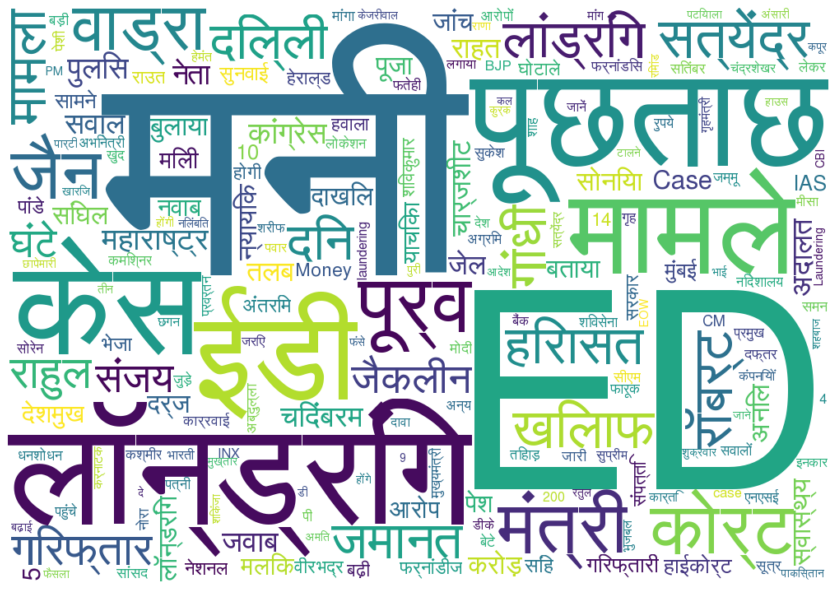

In [25]:
df_list = []
for i in range(len(df)):
    df_list +=df['news_title'][i]

font = "gargi.ttf"
dictionary=Counter(df_list)
wordcloud = WordCloud(width = 1000, height = 700,
                background_color ='white',
                min_font_size = 10, font_path= font).generate_from_frequencies(dictionary)
# plot the WordCloud image                      
plt.figure(figsize = (18, 8), facecolor = None)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()